In [22]:
import os
from tqdm import tqdm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
import librosa
import librosa.display
from python_speech_features import mfcc, logfbank

In [2]:
def plot_signals(signals):
    fig, axes = plt.subplots(nrows=2, ncols=5, sharex=False,
                             sharey=True, figsize=(20,5))
    fig.suptitle('Time Series', size=16)
    i = 0
    for x in range(2):
        for y in range(5):
            axes[x,y].set_title(list(signals.keys())[i])
            axes[x,y].plot(list(signals.values())[i])
            axes[x,y].get_xaxis().set_visible(False)
            axes[x,y].get_yaxis().set_visible(False)
            i += 1

In [3]:
def plot_fft(fft):
    fig, axes = plt.subplots(nrows=2, ncols=5, sharex=False,
                             sharey=True, figsize=(20,5))
    fig.suptitle('Fourier Transforms', size=16)
    i = 0
    for x in range(2):
        for y in range(5):
            data = list(fft.values())[i]
            Y, freq = data[0], data[1]
            axes[x,y].set_title(list(fft.keys())[i])
            axes[x,y].plot(freq, Y)
            axes[x,y].get_xaxis().set_visible(False)
            axes[x,y].get_yaxis().set_visible(False)
            i += 1

In [4]:
def plot_fbank(fbank):
    fig, axes = plt.subplots(nrows=2, ncols=5, sharex=False,
                             sharey=True, figsize=(20,5))
    fig.suptitle('Filter Bank Coefficients', size=16)
    i = 0
    for x in range(2):
        for y in range(5):
            axes[x,y].set_title(list(fbank.keys())[i])
            axes[x,y].imshow(list(fbank.values())[i],
                    cmap='hot', interpolation='nearest')
            axes[x,y].get_xaxis().set_visible(False)
            axes[x,y].get_yaxis().set_visible(False)
            i += 1

In [5]:
def plot_mfccs(mfccs):
    fig, axes = plt.subplots(nrows=2, ncols=5, sharex=False,
                             sharey=True, figsize=(20,5))
    fig.suptitle('Mel Frequency Cepstrum Coefficients', size=16)
    i = 0
    for x in range(2):
        for y in range(5):
            axes[x,y].set_title(list(mfccs.keys())[i])
            axes[x,y].imshow(list(mfccs.values())[i],
                    cmap='hot', interpolation='nearest')
            axes[x,y].get_xaxis().set_visible(False)
            axes[x,y].get_yaxis().set_visible(False)
            i += 1

In [ ]:
def calc_fft(y, rate):
    n = len(y)
    np.fft.rfftfreq(n, d=1/rate)
    Y = abs(np.fft.rfft(y))

Read Annotation Filer

In [7]:
df = pd.read_excel('./NewDataset/sounds.xlsx')

In [8]:
df

,index,fname,label
0,0,a1.wav,asthma
1,1,a2.wav,asthma
2,2,a3.wav,asthma
3,3,a4.wav,asthma
4,4,a5.wav,asthma
5,5,a6.wav,asthma
6,6,a7.wav,asthma
7,7,a8.wav,asthma
8,8,a9.wav,asthma
9,9,a10.wav,asthma


In [9]:
df.set_index('fname',inplace=True)

In [12]:
for f in df.index:
    rate, signal = wavfile.read('./NewDataset/Recordings/'+f)
    df.at[f, 'length'] = signal.shape[0]/rate

In [13]:
df

,index,label,length
fname,,,
a1.wav,0,asthma,44.930625
a2.wav,1,asthma,45.998750
a3.wav,2,asthma,35.735521
a4.wav,3,asthma,46.138062
a5.wav,4,asthma,45.743313
a6.wav,5,asthma,46.184500
a7.wav,6,asthma,45.766542
a8.wav,7,asthma,36.826854
a9.wav,8,asthma,45.952292


In [16]:
classes = list(np.unique(df.label))
class_dist = df.groupby(['label'])['length'].mean()

In [27]:
classes

['asthma', 'normal']

In [17]:
class_dist

label
asthma    41.280443
normal    30.594845
Name: length, dtype: float64

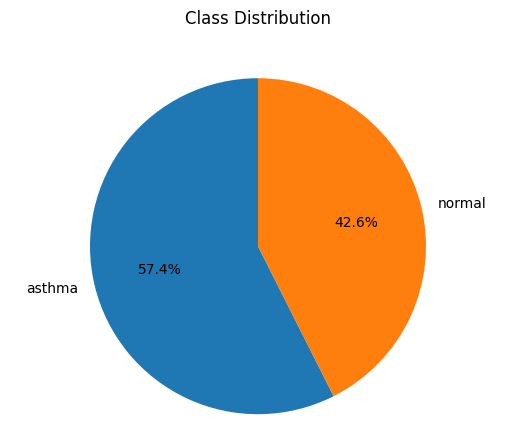

In [19]:
fig, ax = plt.subplots()
ax.set_title('Class Distribution', y = 1.08)
ax.pie(class_dist, labels = class_dist.index, autopct='%1.1f%%',
       shadow=False, startangle=90)

ax.axis('equal')
plt.show()
df.reset_index(inplace=True)

In [ ]:
signals = {}
fft = {}
fbank = {}
mfccs = {}

In [24]:
for c in classes:
    wav_file = df[df.label == c].iloc[0,0]
    signal, rate = librosa.load('./NewDataset/Recordings/'+wav_file, sr=48000)
    signals[c] = signal
    fft[c] = calc_fft(signal, rate)

In [25]:
signal

array([0.        , 0.        , 0.        , ..., 0.02891252, 0.02869193,
       0.02849781], dtype=float32)

In [26]:
rate

48000